# Assignment 8 Clustering K-Means and DBSCAN

###### 1: Work through the book – build your own K Means cluster function and carry out the modelling done in the book.

In [1]:
# 1 - function that measures how many coordinates two vectors differ in
import sys
sys.path.insert(1, "C:\\Users\\jplm\\Desktop\\Softwareudvikler\\Data science\\data-science-from-scratch")

from scratch.linear_algebra import Vector

def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

assert num_differences([1, 2, 3], [2, 1, 3]) == 2
assert num_differences([1, 2], [1, 2]) == 0

In [2]:
# 2 function that, given some vectors and their assignments to clusters, computes the means of the clusters
from typing import List
from scratch.linear_algebra import vector_mean

def cluster_means(k: int,
    inputs: List[Vector],
    assignments: List[int]) -> List[Vector]:
    
    # clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)
        
    # if a cluster is empty, just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs)
            for cluster in clusters]


In [3]:
# 3 Code our cluster
import itertools
import random
import tqdm
from scratch.linear_algebra import squared_distance

class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k # number of clusters
        self.means = None
        
    def classify(self, input: Vector) -> int:
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
        key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs: List[Vector]) -> None:
        # Start with random assignments
        assignments = [random.randrange(self.k) for _ in inputs]
    
        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute means and find new assignments
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]
        
                # Check how many assignments changed and if we're done
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return
        
                # Otherwise keep the new assignments, and compute new means
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed} / {len(inputs)}")

In [4]:
# Inputs
inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

In [5]:
# 4 Compute budget for three meetups
random.seed(12) # so you get the same results as me
clusterer = KMeans(k=3)
clusterer.train(inputs)
means = sorted(clusterer.means) # sort for the unit test
assert len(means) == 3

# Check that the means are close to what we expect
assert squared_distance(means[0], [-44, 5]) < 1
assert squared_distance(means[1], [-16, -10]) < 1
assert squared_distance(means[2], [18, 20]) < 1


changed: 5 / 20: : 1it [00:00, 500.57it/s]


In [6]:
# 5 Only budget for 2 meetups
random.seed(0)
clusterer = KMeans(k=2)
clusterer.train(inputs)
means = sorted(clusterer.means)

assert len(means) == 2
assert squared_distance(means[0], [-26, -5]) < 1
assert squared_distance(means[1], [18, 20]) < 1


changed: 4 / 20: : 2it [00:00, 994.26it/s]


# Choosing k
###### In the previous example, the choice of k was driven by factors outside of our control. In general, this won’t be the case. There are various ways to choose a k. One that’s reasonably easy to understand involves plotting the sum of squared errors (between each point and the mean of its cluster) as a function of k and looking at where the graph “bends”

In [7]:
# 1 Sum of squared errors
from matplotlib import pyplot as plt

def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = [clusterer.classify(input) for input in inputs]
    
    return sum(squared_distance(input, means[cluster])
        for input, cluster in zip(inputs, assignments))


0it [00:00, ?it/s]
changed: 8 / 20: : 1it [00:00, 500.10it/s]
changed: 2 / 20: : 2it [00:00, 1001.27it/s]
changed: 2 / 20: : 2it [00:00, 564.09it/s]
changed: 2 / 20: : 4it [00:00, 800.02it/s]
changed: 1 / 20: : 3it [00:00, 748.58it/s]
changed: 1 / 20: : 5it [00:00, 832.60it/s]
changed: 4 / 20: : 2it [00:00, 495.05it/s]
changed: 2 / 20: : 3it [00:00, 599.61it/s]
changed: 4 / 20: : 3it [00:00, 748.89it/s]
changed: 1 / 20: : 3it [00:00, 749.43it/s]
changed: 1 / 20: : 3it [00:00, 428.59it/s]
changed: 1 / 20: : 3it [00:00, 456.93it/s]
changed: 1 / 20: : 3it [00:00, 432.31it/s]
changed: 1 / 20: : 4it [00:00, 497.49it/s]
changed: 3 / 20: : 3it [00:00, 421.24it/s]
changed: 1 / 20: : 4it [00:00, 648.55it/s]
changed: 3 / 20: : 3it [00:00, 499.62it/s]
changed: 3 / 20: : 3it [00:00, 599.87it/s]
changed: 1 / 20: : 5it [00:00, 453.14it/s]


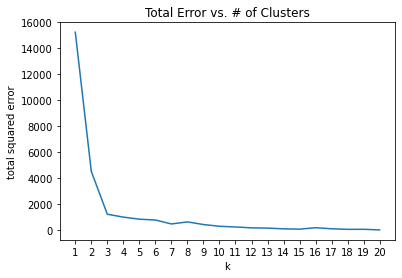

In [8]:
# 2 Applying to to previous example
# now plot from 1 up to len(inputs) clusters
ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

###### In the book we eyeballed that there were 3 clusters. Here we can see in the elbow method using distortion that this is true.

# Example: Clustering Colors

In [11]:
# 1 Command to be able to import an image into python
# python -m pip install pillow

image_path = r"images\minion.jpg" # wherever your image is
import matplotlib.image as mpimg
img = mpimg.imread(image_path) / 256 # rescale to between 0 and 1


###### img[i][j] is the pixel in the ith row and jth column, and each pixel is a list [red, green, blue] of numbers between 0 and 1 indicating the color of that pixel

In [12]:
# 2 Getting the pixel colors
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

# .tolist() converts a NumPy array to a Python list
pixels = [pixel.tolist() for row in img for pixel in row]

# Feed the pixels to the cluster
clusterer = KMeans(5)
clusterer.train(pixels) # this might take a while


changed: 8 / 223020: : 36it [01:30,  2.52s/it]    


In [13]:
# 3 Construct a new image with the same format with the following function
def recolor(pixel: Vector) -> Vector:
    cluster = clusterer.classify(pixel) # index of the closest cluster
    return clusterer.means[cluster] # mean of the closest cluster

new_img = [[recolor(pixel) for pixel in row] # recolor this row of pixels
for row in img] # for each row in the image

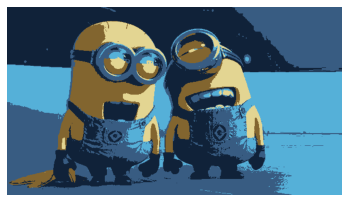

In [14]:
# 4 Display the image with plt.imshow
plt.imshow(new_img)
plt.axis('off')
plt.show()


# Bottom-Up Hierarchical Clustering

###### An alternative approach to clustering is to “grow” clusters from the bottom up. We can do this in the following way:
1. Make each input its own cluster of one.
2. As long as there are multiple clusters remaining, find the two closest clusters and merge them.

In [16]:
# 1 Simple representation of clusters. The values will live in leaf clusters. Will be represented as NamedTuples
from typing import NamedTuple, Union

class Leaf(NamedTuple):
    value: Vector
    
leaf1 = Leaf([10, 20])
leaf2 = Leaf([30, -15])

In [17]:
# 2 Grow merged clusters which also is represented as NamedTuples
class Merged(NamedTuple):
    children: tuple
    order: int
    
merged = Merged((leaf1, leaf2), order=1)

Cluster = Union[Leaf, Merged]

In [18]:
# 3 Helper function that recursively will return all values contained in a possible (possibly merged) cluster
def get_values(cluster: Cluster) -> List[Vector]:
    if isinstance(cluster, Leaf):
        return [cluster.value]
    else:
        return [value
                for child in cluster.children
                for value in get_values(child)]

assert get_values(merged) == [[10, 20], [30, -15]]

In [21]:
# 4 Merge with the closest cluster.  
# Can use the minimum distance or the (will sometimes produce large chain-like clusters that aren’t very tight)
# For tight spherical clusters, we might use the maximum distance instead
# Both are common choices, as is the average distance
from typing import Callable
from scratch.linear_algebra import distance

def cluster_distance(cluster1: Cluster,
                     cluster2: Cluster,
                     distance_agg: Callable = min) -> float:
    """
    compute all the pairwise distances between cluster1 and cluster2
    and apply the aggregation function _distance_agg_ to the resulting list
    """
    return distance_agg([distance(v1, v2)
                         for v1 in get_values(cluster1)
                         for v2 in get_values(cluster2)])



###### Helper functions for creation of clusters

In [24]:
# 5 Helper function
# Leaf clusters were never merged, we’ll assign them infinity, the highest possible value. 
# And since they don’t have an .order property, we’ll create a helper function
def get_merge_order(cluster: Cluster) -> float:
    if isinstance(cluster, Leaf):
        return float('inf') # was never merged
    else:
        return cluster.order

In [25]:
# 6 Helper function
# Leaf clusters don’t have children, we’ll create and add a helper function for that
from typing import Tuple

def get_children(cluster: Cluster):
    if isinstance(cluster, Leaf):
        raise TypeError("Leaf has no children")
    else:
        return cluster.children

###### Creating the clustering algorithm

In [27]:
# 7 Clustering bottom-up with the following algorithm 
def bottom_up_cluster(inputs: List[Vector],
                      distance_agg: Callable = min) -> Cluster:
    # Start with all leaves
    clusters: List[Cluster] = [Leaf(input) for input in inputs]
    
    def pair_distance(pair: Tuple[Cluster, Cluster]) -> float:
        return cluster_distance(pair[0], pair[1], distance_agg)
    
    # as long as we have more than one cluster left...
    while len(clusters) > 1:
        # find the two closest clusters
        c1, c2 = min(((cluster1, cluster2)
                       for i, cluster1 in enumerate(clusters)
                       for cluster2 in clusters[:i]),
                       key=pair_distance)
        
        # remove them from the list of clusters
        clusters = [c for c in clusters if c != c1 and c != c2]
        
        # merge them, using merge_order = # of clusters left
        merged_cluster = Merged((c1, c2), order=len(clusters))

        # and add their merge
        clusters.append(merged_cluster)
    
    # when there's only one cluster left, return it
    return clusters[0]


In [29]:
# 8 Using the algorithm we made
base_cluster = bottom_up_cluster(inputs)

###### With the 20 inputs we had it took 19 merges to get one big cluster.

In [31]:
# 9 Function that generates any number of clusters by performing the appropriate number of unmerges
def generate_clusters(base_cluster: Cluster,
                      num_clusters: int) -> List[Cluster]:
    # start with a list with just the base cluster
    clusters = [base_cluster]
    
    # as long as we don't have enough clusters yet...
    while len(clusters) < num_clusters:
        # choose the last-merged of our clusters
        next_cluster = min(clusters, key=get_merge_order)
        # remove it from the list
        clusters = [c for c in clusters if c != next_cluster]
        
        # and add its children to the list (i.e., unmerge it)
        clusters.extend(get_children(next_cluster))
        
    # once we have enough clusters...
    return clusters


In [32]:
# 10 Generating 3 clusters instead of 1 with the following:
three_clusters = [get_values(cluster)
                  for cluster in generate_clusters(base_cluster, 3)]

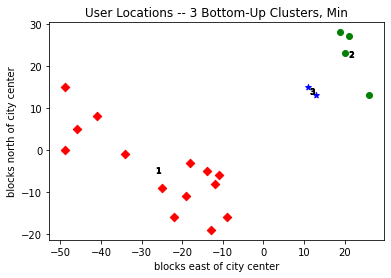

In [36]:
# 11 Plotting our clusers for visualization purposes
# We use a scatterplot since we want to display the "relationship" between our values 
for i, cluster, marker, color in zip([1, 2, 3],
                                     three_clusters,
                                     ['D','o','*'],
                                     ['r','g','b']):
    xs, ys = zip(*cluster) # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)
    
    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')

plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()


###### This gives a different result when comparing to our k-mean algorithm. This is because we are using the min in cluster_distance which causes chain-like clusters. If we instead had used max it would look like the 3-means result.

#### Note:
Taken from the book: Data Science from Scratch SECOND EDITION First Principles with Python Joel Grus
page 354, chapter 20, clustering.

<q>The previous bottom_up_clustering implementation is relatively simple, but also
shockingly inefficient. In particular, it recomputes the distance between each pair of
inputs at every step. A more efficient implementation might instead precompute the
distances between each pair of inputs and then perform a lookup inside
cluster_distance. A really efficient implementation would likely also remember the
cluster_distances from the previous step.</q>


# For Further Exploration
- scikit-learn has an entire module, sklearn.cluster, that contains
several clustering algorithms including KMeans and the Ward
hierarchical clustering algorithm (which uses a different criterion
for merging clusters than ours did).

- SciPy has two clustering models: scipy.cluster.vq, which does
k-means, and scipy.cluster.hierarchy, which has a variety of
hierarchical clustering algorithms